In [1]:
df_r = _deepnote_execute_sql('SELECT *\nFROM \'creditcard.csv\'', 'SQL_DEEPNOTE_DATAFRAME_SQL', audit_sql_comment='', sql_cache_mode='cache_disabled')
df_r

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [98]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler

import pandas as pd

In [100]:
x = df_r.drop("Class", axis=1)
y = df_r["Class"]

In [102]:
x = StandardScaler().fit_transform(x)

In [104]:
X_train, X_test, y_train, y_test = train_test_split(
    x, y, random_state=42
)

In [105]:
m = LogisticRegression().fit(X_train, y_train)

In [107]:
acc = accuracy_score(y_test, m.predict(X_test))

In [108]:
acc

0.9991994606893064

In [116]:
from sklearn.metrics import classification_report


print(classification_report(y_test, m.predict(X_test)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71089
           1       0.85      0.60      0.70       113

    accuracy                           1.00     71202
   macro avg       0.92      0.80      0.85     71202
weighted avg       1.00      1.00      1.00     71202



In [118]:
mat_conf = confusion_matrix(y, m.predict(x))

mat_conf.shape (2, 2)


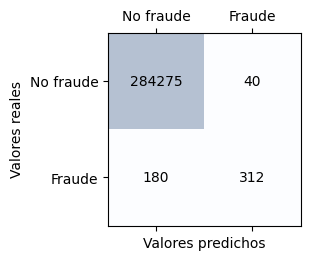

In [119]:
from matplotlib import pyplot as plt

etiquetas = ["No fraude", "Fraude"]
# Trazado de la matriz de confusión
fig, ax = plt.subplots(figsize=(2.5,2.5))
ax.matshow(mat_conf, cmap=plt.cm.Blues, alpha=.3)
print("mat_conf.shape", mat_conf.shape)
for i in range(mat_conf.shape[0]):
    for j in range(mat_conf.shape[1]):
        ax.text(x=j, y=i, s=mat_conf[i, j], va='center', ha='center')
        plt.xlabel("Valores predichos")
        plt.ylabel("Valores reales")

import numpy as np

ax.set_xticks(np.arange(len(etiquetas)))
ax.set_yticks(np.arange(len(etiquetas)))
ax.set_xticklabels(etiquetas)
ax.set_yticklabels(etiquetas)

fig.show()

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=d5d7a80e-5d50-4663-9a37-f2b1ea7bd32d' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>